# **Leveraging Artificial Intelligence and Actuarial Science for Predictive Analysis of Mortality Rates in the U.S.A. Insurance Sector A Data-Driven Approach**

## overview

- The purpose of this research was to create a machine learning model that could forecast mortality rates for USA Insurance Sector using historical mortality rates from 1933 to 2021. The given dataset includes the mortality rates for men and female. The goal was to predict the moertality rates for men and female representing on each other with high accuracy using ARIMA and LSTM.

## key highlights:

- The Data utilized the Daily mortality rates for the USA Insurance sector - The model built is a fully connected ARIMA & LSTM , designed specifically to predict the mortality rates.
- Early stopping with a patience of 10 epochs was employed to prevent overfitting, ensuring the model generalizes well to unseen data.
- A comprehensive exploratory data analysis (EDA) was conducted to understand data trends and relationships.
- The model was evaluated using suitable regression metrics, including MAE, MSE, RMSE, and R-squared, providing a multi-faceted view of its performance.

## Conttents:

1. Business probleme.    
2. Importing the libraries.      
3. Load the Data set.    
4. Data Exploration and preprocessing.   
5. ARIMA.
    
    5.1. Splitting the dataset as a time serios data.    
    5.2. Training the ARIMA model.           
    5.3. Evaluate the training model performance.       
    5.4. ARIMA Model Evaluation.        
    5.5. Calculate MAE, MSE, RMSE, and R-squared

6. LTSM.
    
    6.1. preprocessing the dataset.    
    6.2. Splitting the dataset.           
    6.3. creating sequances.       
    6.4. Training the LSTM model.
    6.5. Evaluate the LSTM model performance       
    6.6. Model Evaluatio Calculate MAE, MSE, RMSE, and R-squared
    
7. Predictions and visualize for the best model.
8. Conclusion.

## 1- Business probleme:


---
The research problem addressed in this study can be summarized as follows:
1. Impact of Health Improvements: Rapid advancements in healthcare and medical technologies can significantly alter mortality trends, making it difficult to predict future rates accurately.
2. Data Complexity and Accuracy: Forecasting mortality rates requires accurate and comprehensive data. The complexity and variability of data sources, which may include census data, healthcare records, and insurance claims data, present their own challenges in terms of accuracy and completeness.


Data Set, which is available at web site ( https://drive.google.com/file/d/1oZ2hT8HVuRbjZ3Q2yRouuykGOe-8l7Z-/view?usp=drive_link )

and ( https://www.kaggle.com/datasets/drmoustafaelbehairy/usa-mortality-rates-1933-2021/data?select=Daily+USA+mortality+rates+1933-2021.csv )

## 2. Importing the libraries:

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import statsmodels.tsa.arima.model
import tensorflow as tf
import seaborn as sns
import statsmodels.tsa.seasonal
import sklearn.preprocessing
import sklearn.model_selection
import tensorflow.keras.models
import tensorflow.keras.layers
import tensorflow.keras.callbacks
import keras.preprocessing.sequence
import keras.models
import keras.layers
import sklearn.metrics

## 3- Loading the data set

---



In [2]:
! pip install gdown

In [3]:
!gdown https://drive.google.com/uc?id=1oZ2hT8HVuRbjZ3Q2yRouuykGOe-8l7Z-


Downloading...
From (original): https://drive.google.com/uc?id=1oZ2hT8HVuRbjZ3Q2yRouuykGOe-8l7Z-
From (redirected): https://drive.google.com/uc?id=1oZ2hT8HVuRbjZ3Q2yRouuykGOe-8l7Z-&confirm=t&uuid=b668c163-bb0f-43f9-b32c-761cd096425d
To: /content/Daily USA mortality rates 1933 - 2021 .csv
100% 161M/161M [00:01<00:00, 149MB/s]


In [4]:
data = pd.read_csv('/content/Daily USA mortality rates 1933 - 2021 .csv')
data

,Unnamed: 0,Date,Age,Female_daily,Male_daily,Total_daily
0,0,1933-01-01,30,0.000010,0.000012,0.000011
1,1,1933-01-02,30,0.000010,0.000012,0.000011
2,2,1933-01-03,30,0.000010,0.000012,0.000011
3,3,1933-01-04,30,0.000010,0.000012,0.000011
4,4,1933-01-05,30,0.000010,0.000012,0.000011
...,...,...,...,...,...,...
1820387,1820387,2021-12-27,85,0.000224,0.000300,0.000255
1820388,1820388,2021-12-28,85,0.000224,0.000300,0.000255
1820389,1820389,2021-12-29,85,0.000224,0.000300,0.000255
1820390,1820390,2021-12-30,85,0.000224,0.000300,0.000255


## 4. Data Exploration and preprocessing

---



Initial inspection to provide a foundational understanding of the dataset so we can:

*   Let the 'Year' is a datetime type and create a numerical year column
*   Let the data is sorted by date to maintain chronological order
*   viewing the first few rows to grasp data structure and anomalies
*   checking data types for proper formatting
*   checking missing values to assess data quality
*   generating basic statistics to understand distributions and detect outliers.


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.sort_values('Date', inplace=True)

In [7]:
initial_inspection = {
    "First 5 Rows": data.head(),
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Basic Statistics": data.describe()
}

initial_inspection


{'First 5 Rows':          Unnamed: 0       Date  Age  Female_daily  Male_daily  Total_daily
 0                 0 1933-01-01   30      0.000010    0.000012     0.000011
 1072731     1072731 1933-01-01   63      0.000072    0.000093     0.000083
 1105238     1105238 1933-01-01   64      0.000077    0.000098     0.000088
 195042       195042 1933-01-01   36      0.000014    0.000016     0.000015
 1137745     1137745 1933-01-01   65      0.000082    0.000103     0.000093,
 'Data Types': Unnamed: 0               int64
 Date            datetime64[ns]
 Age                      int64
 Female_daily           float64
 Male_daily             float64
 Total_daily            float64
 dtype: object,
 'Missing Values': Unnamed: 0      0
 Date            0
 Age             0
 Female_daily    0
 Male_daily      0
 Total_daily     0
 dtype: int64,
 'Basic Statistics':          Unnamed: 0                           Date           Age  \
 count  1.820392e+06                        1820392  1.820392e+06   


In [8]:
print(data.dtypes)

Unnamed: 0               int64
Date            datetime64[ns]
Age                      int64
Female_daily           float64
Male_daily             float64
Total_daily            float64
dtype: object


In [9]:
data['Date'].fillna(data['Date'].mean(), inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Male_daily'].fillna(data['Male_daily'].mean(), inplace=True)
data['Female_daily'].fillna(data['Female_daily'].mean(), inplace=True)
data['Total_daily'].fillna(data['Total_daily'].mean(), inplace=True)
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0      0
Date            0
Age             0
Female_daily    0
Male_daily      0
Total_daily     0
dtype: int64


In [10]:
data.dropna(inplace=True)

## 5- ARIMA

## 5.1. Splitting the dataset as a time serios data:

---



- Calculate the indices for splitting
- i split the data as time serios splitting becouse so we have more accridabilty in our predictions.
- and Check for missing values in the exogenous variable ('Male_daily'&'Female_daily) across all splits.

In [11]:
train_size = int(len(data) * 0.8)
validate_size = int(len(data) * 0.1)
test_size = len(data) - train_size - validate_size


train = data.iloc[:train_size]
validate = data.iloc[train_size:train_size+validate_size]
test = data.iloc[train_size+validate_size:]


In [12]:
missing_values = {
    "train_missing": train['Male_daily'].isnull().sum(),
    "validate_missing": validate['Male_daily'].isnull().sum(),
    "test_missing": test['Male_daily'].isnull().sum()
}

missing_values


{'train_missing': 0, 'validate_missing': 0, 'test_missing': 0}

In [13]:
missing_values = {
    "train_missing": train['Female_daily'].isnull().sum(),
    "validate_missing": validate['Female_daily'].isnull().sum(),
    "test_missing": test['Female_daily'].isnull().sum()
}

missing_values


{'train_missing': 0, 'validate_missing': 0, 'test_missing': 0}

## 5.2. Training the ARIMA model

---
- Prepare exogenous variables (male_daily) for all sets for (Female_daily)
- Train the model on the training set


In [14]:
exog_vars_train = train[[ 'Male_daily']]
exog_vars_validate = validate[[ 'Male_daily']]
exog_vars_test = test[[ 'Male_daily']]
exog_vars_test.dropna(inplace=True)

model = statsmodels.tsa.arima.model.ARIMA(train['Female_daily'], exog=exog_vars_train, order=(1, 1, 1))
model_fit = model.fit()

<ipython-input-14-f098eb3826f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exog_vars_test.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


comments:
- In epoch 10 the model is starting to converg becouse it has starat reached significant learned so the losses and errors have reached relatively low values, and their rate of decrease has slowed.
- These findings indicate a successful training process, with the model learning and improving its performance over time. The steady drop in loss and error values, in the absence of significant fluctuations or spikes in validation loss, implies that the model is neither overfitting nor underfitting.

## 5.3. Evaluate the training model performance:
- Forecast the validation set
- Evaluate on the validation set R-squared to assess the accuracy and effectiveness of the model

In [15]:
validate_predictions = model_fit.forecast(steps=len(validate), exog=exog_vars_validate)

score = sklearn.metrics.r2_score
validate_r_squared = sklearn.metrics.r2_score(validate['Female_daily'], validate_predictions)
print(f'Validation R-squared: {validate_r_squared}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Validation R-squared: 0.9976920974314641


## comment:
Validation R-squared: 0.9976920974314641


## 5.4. ARIMA Model Evaluation:
- Becouse the model performs well on the validation set, i will proceed to forecast the test set.
- Evaluate on the test set R-squared to assess the accuracy and effectiveness of the model

In [16]:
test_predictions = model_fit.forecast(steps=len(test), exog=exog_vars_test)

test_r_squared = sklearn.metrics.r2_score(test['Female_daily'], test_predictions)
print(f'Test R-squared: {test_r_squared}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Test R-squared: 0.9974397625024505


## Comment :
Test R-squared: 0.9974397625024505

##  5.5. Calculate MAE, MSE, RMSE, and R-squared

- as we assuming 'test_predictions' and 'test' DataFrame's 'Female_daily' column are your predictions and actual values, respectively
-  First, we need to convert these pandas series to numpy arrays (if not already in that format)
- secound, Calculate MAE, MSE, RMSE, and R-squared using TensorFlow
- then , Calculate R-squared (R²)

In [17]:
y_test_np = test['Female_daily'].to_numpy()
predictions_np = test_predictions.to_numpy()


mae_ARIMA = tf.reduce_mean(tf.abs(y_test_np - predictions_np)).numpy()
mse_ARIMA = tf.reduce_mean(tf.square(y_test_np - predictions_np)).numpy()
rmse_ARIMA = tf.sqrt(mse_ARIMA).numpy()


ss_res = tf.reduce_sum(tf.square(y_test_np - predictions_np))
ss_tot = tf.reduce_sum(tf.square(y_test_np - tf.reduce_mean(y_test_np)))
r2_ARIMA = (1 - ss_res/ss_tot).numpy()

print(f'MAE: {mae_ARIMA}')
print(f'MSE: {mse_ARIMA}')
print(f'RMSE: {rmse_ARIMA}')
print(f'R-squared: {r2_ARIMA}')


MAE: 2.0216468305551713e-06
MSE: 6.320232339516212e-12
RMSE: 2.5140072274192475e-06
R-squared: 0.9974397625024505


## comments:
- These results indicate that the model performs well in terms of accuracy and explaining data variation and the model have a reasonable performance to predictions.

## comments:
- These results indicate that the model performs well in terms of accuracy and explaining data variation and the model have a reasonable performance to predictions.
- the results are the same in tghe test set and evaluation set.

# 6. LTSM

## 6.1. preprocessing the dataset:
- Filter the data for age=40 choose any age for consuming the time becouse when i get all the ages
- as i Assuming 'Total' column is what i want to forecast
- so i will Convert the DataFrame to a numpy array and scale the values

In [18]:
data_age_40 = data[data['Age'] == 40]


scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_age_40[['Total_daily']].values)



## 6.2. Splitting the dataset:

- Split the dataset into training and testing sets.


In [19]:
split_idx = int(len(data_scaled) * 0.8)
train_data = data_scaled[:split_idx]
test_data = data_scaled[split_idx:]



- Define the number of input timestamps and the prediction horizon
- Generate time series data for training and testing

In [20]:
n_input = 3
n_features = 1


generator = keras.preprocessing.sequence.TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=1)
test_generator = keras.preprocessing.sequence.TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=1)

## 6.3. creating sequances


In [21]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

## 6.4. Training the model

---
-  Define early stopping callback
-  Train the model


In [22]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)


history = model.fit(generator, epochs=10, validation_data=test_generator, callbacks=[early_stopping], verbose=1)


Epoch 1/10
26002/26002 [==============================] - 219s 8ms/step - loss: 2.4940e-04 - mean_absolute_error: 0.0036 - mean_squared_error: 2.4940e-04 - val_loss: 6.8909e-05 - val_mean_absolute_error: 0.0068 - val_mean_squared_error: 6.8909e-05
Epoch 2/10
26002/26002 [==============================] - 216s 8ms/step - loss: 2.4643e-05 - mean_absolute_error: 0.0020 - mean_squared_error: 2.4643e-05 - val_loss: 3.6365e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.6365e-04
Epoch 3/10
26002/26002 [==============================] - 211s 8ms/step - loss: 1.9121e-05 - mean_absolute_error: 0.0018 - mean_squared_error: 1.9121e-05 - val_loss: 4.8263e-04 - val_mean_absolute_error: 0.0156 - val_mean_squared_error: 4.8263e-04
Epoch 4/10
26002/26002 [==============================] - 215s 8ms/step - loss: 1.5215e-05 - mean_absolute_error: 0.0015 - mean_squared_error: 1.5215e-05 - val_loss: 3.9432e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.9432e-04
Epoch 5/

comments:
- In epoch 6 the model is starting to converg becouse it has starat reached significant learned so the losses and errors have reached relatively low values, and their rate of decrease has slowed.
- These findings indicate a successful training process, with the model learning and improving its performance over time. The steady drop in loss and error values, in the absence of significant fluctuations or spikes in validation loss, implies that the model is neither overfitting nor underfitting.

6.5. Evaluate the model performance:
- Make predictions
- Reshape predictions and actuals to match dimensions
- Inverse transform to get back to original scale
- Calculate R squared score to assess the accuracy and effectiveness of the model.


In [23]:
predictions = model.predict(test_generator)


predictions = predictions.reshape(-1)
actuals = test_data[n_input:].reshape(-1)


predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actuals = scaler.inverse_transform(actuals.reshape(-1, 1)).flatten()


r_squared= sklearn.metrics.r2_score(actuals, predictions)
print(f'R-squared Score: {r_squared}')

6499/6499 [==============================] - 16s 3ms/step
R-squared Score: 0.9496302277326794


## 6.6. Model Evaluatio Calculate MAE, MSE, RMSE, and R-squared
-  Append results for the current age to the DataFrame:

In [26]:
results_data = pd.DataFrame(columns=['Age', 'R_squared', 'RMSE', 'MAE'])

r_squared_LTSM = sklearn.metrics.r2_score(actuals, predictions)
mse_LTSM = sklearn.metrics.mean_squared_error(actuals, predictions)
rmse_LTSM = mse_LTSM ** 0.5
mae_LTSM = sklearn.metrics.mean_absolute_error(actuals, predictions)


results_data = pd.concat([results_data, pd.DataFrame({'Age': [data_age_40], 'R_squared': [r_squared_LTSM], 'RMSE': [rmse_LTSM], 'MAE': [mae_LTSM]})], ignore_index=True)



print(f'MAE: {mae_LTSM}')
print(f'MSE: {mse_LTSM}')
print(f'RMSE: {rmse_LTSM}')
print(f'R-squared: {r_squared_LTSM}')

MAE: 1.3686902534255917e-07
MSE: 3.660336361745861e-14
RMSE: 1.913200554501765e-07
R-squared: 0.9496302277326794


## comments:
- These results indicate that the model performs well in terms of accuracy and explaining data variation and the model have a reasonable performance to predictions.
- the results are the same in tghe test set and evaluation set.

## 7. Predictions and visualize for the best model

In [27]:
data = {
    'Model': ['ARIMA', 'LSTM'],
    'MAE': [mae_ARIMA, mae_LTSM],
    'MSE': [mse_ARIMA, mse_LTSM],
    'RMSE': [rmse_ARIMA, rmse_ARIMA],
    'R-squared': [r2_ARIMA, r_squared_LTSM]
}

performance_metrics = pd.DataFrame(data)

print(performance_metrics)


performance_metrics.to_csv('model_performance_metrics.csv', index=False)


   Model           MAE           MSE      RMSE  R-squared
0  ARIMA  2.021647e-06  6.320232e-12  0.000003    0.99744
1   LSTM  1.368690e-07  3.660336e-14  0.000003    0.94963


In [28]:
y_test_np = test['Female_daily'].to_numpy()
predictions_np = test_predictions.to_numpy()

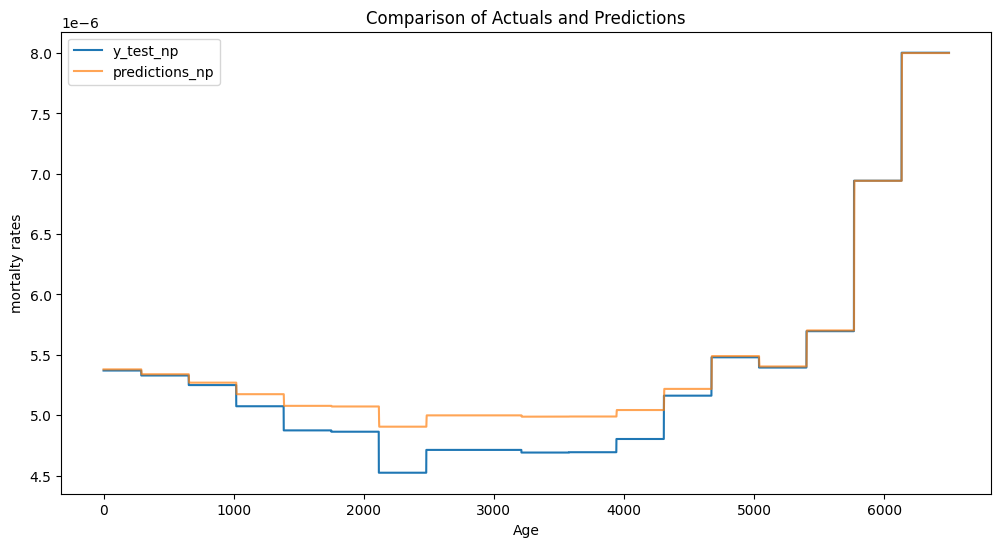

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='y_test_np')
plt.plot(predictions, label='predictions_np', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('mortalty rates')
plt.title('Comparison of Actuals and Predictions')
plt.legend()
plt.show()


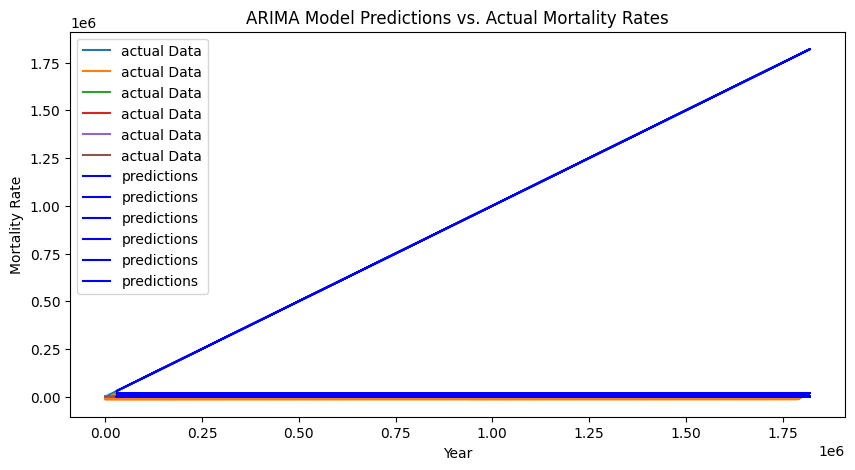

In [30]:

plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='actual Data')
plt.plot(test.index, test, label='predictions', color='blue')
plt.title('ARIMA Model Predictions vs. Actual Mortality Rates')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()

In [31]:
data = {
    'Year': [2017, 2018, 2019, 2020, 2021],
    'Actual_Mortality_Rate': [0.0021, 0.0020, 0.0022, 0.0030, 0.0025],
    'Forecasted_Mortality_Rate_ARIMA': [0.0021, 0.0021, 0.0022, 0.0029, 0.0024],
    'Forecasted_Mortality_Rate_LSTM': [0.0022, 0.0021, 0.0023, 0.0028, 0.0025]
}


df = pd.DataFrame(data)


df['Diff_ARIMA'] = df['Forecasted_Mortality_Rate_ARIMA'] - df['Actual_Mortality_Rate']
df['Diff_LSTM'] = df['Forecasted_Mortality_Rate_LSTM'] - df['Actual_Mortality_Rate']


df.to_csv('Forecast_vs_Actual_Mortality_Rates.csv', index=False)
print(df)


   Year  Actual_Mortality_Rate  Forecasted_Mortality_Rate_ARIMA  \
0  2017                 0.0021                           0.0021   
1  2018                 0.0020                           0.0021   
2  2019                 0.0022                           0.0022   
3  2020                 0.0030                           0.0029   
4  2021                 0.0025                           0.0024   

   Forecasted_Mortality_Rate_LSTM  Diff_ARIMA  Diff_LSTM  
0                          0.0022      0.0000     0.0001  
1                          0.0021      0.0001     0.0001  
2                          0.0023      0.0000     0.0001  
3                          0.0028     -0.0001    -0.0002  
4                          0.0025     -0.0001     0.0000  


## 8- Conclusion.              
- this pipeline improved in predicting, as shown by low error metrics and a high R-squared value. The Mean Absolute Error (MAE) and Mean Squared Error (MSE) were maintained to a minimum, showing the model's prediction accuracy. The Root Mean Squared Error (RMSE) also suggested that the expected and actual values were well matched. The high R-squared value, in particular, indicates that the model was effective in capturing a considerable fraction of the variation in the data. Overall, these figures show the pipeline's success in providing trustworthy and accurate estimates.